# Topic 25-Pt 1: Intro to Logistic Regression 

- onl01-dtsc-ft-022221
- 05/06/21

## Questions?

- 

## Announcements

- **Sect 25 will be split into 2 study groups.**
- Sect 26 doesn't introduce much/anything new
    - It revisits gradient descent and applies it to Logistic Regression.
    - **We will discuss** some of the concepts re-introduced next study group.
    - **We will NOT have an entire study group** dedicated to section 26


- **You will want/need to update matplotlib and scikit-learn** ( See IMPORTANT NOTE ABOUT PACKAGE VERSIONS)
   

## Topics in Sect 25

- For Today:
    - Supervised vs Unsupervised Learning
    - Logistic Regression - Theory
    - Applying Logistic Regression with `statsmodels`
    - Evaluating Classifiers
        - Confusion Matrices
        - Accuracy, Precision, Recall, F1-Score

            - If there's time today (otherwise covered in part 2 tomorrow):
             

- For Next Class:
    - Logistic Regression with `scikit-learn`
    - Evaluating Classifiers:
        - ROC-AUC curve
    - Class Imbalance Problems

# Types of Machine Learning Models

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/ai_machine_learning_deep_learning.png">

## Intro to Supervised Learning

> "The term **_Supervised Learning_** refers to a class of machine learning algorithms that can "learn" a task through **_labeled training data_**."

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-intro-to-supervised-learning-v2-1-online-ds-pt-100719/master/images/new_ml-hierarchy.png" width=60%>

- All machine learning models fall into one of two categories:
    - Regressors/Regression
    - Classifiers/Classification

### Regression

Trying to find the **relationship** and predict a specific value.

- Examples of regressions:
    - House prices
    - Salary
    - Reviews/Ratings

### Classification

Trying to identify what features can predict which class a particular observation/row belongs to.
- Can be a "binary classification" 
    - "yes" or "no"
    - Survived or died.
    - Diabetic or not-diabetic
- Can also be a "multiclass classification"
    - Which type of flower?
    - Will a football game end one team winning, or the other team, or a tie?


# From Linear Regression to Logistic Regression


<img src="https://raw.githubusercontent.com/jirvingphd/online-dtsc-pt-041320-cohort-notes/master/assets/images/logistic_vs_linear.jpg">

## Recall Linear Regression

### Formula

$$ \large \hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n = \sum_{i=0}^{N} \beta_i x_i $$

- Output is specifying the **predicted value** for the target

## Classification: Use Logistic Regression

- Output is specifying the **probability** of belonging to a particular group

- Visual Example:
    - https://www.desmos.com/calculator/y2ilpxiqys

Transform from linear regression!

$$ \large \hat y = \sum_{i=0}^{N} \beta_i x_i $$

$$\large P = \displaystyle \frac{1}{1+e^{-\hat y}} = \frac{1}{1+e^{-\sum_{i=0}^{N} \beta_i x_i}} $$

$$ \large = \frac{1}{1+e^{-\beta_0}e^{-\beta_1 x_1}\ldots e^{-\beta_N x_N}} $$

# Implementing Logistic Regression

## Predict Passenger Survival on Titanic - `statsmodels`

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
url = "https://raw.githubusercontent.com/jirvingphd/dsc-dealing-missing-data-lab-online-ds-ft-100719/master/titanic.csv"
df = pd.read_csv(url,index_col=0)
relevant_columns = ['Pclass', 'Age', 'SibSp', 'Fare', 'Sex', 'Embarked', 'Survived']
df = df[relevant_columns]
df.head()

,Pclass,Age,SibSp,Fare,Sex,Embarked,Survived
0,3,22.0,1,7.2500,male,S,0
1,1,38.0,1,71.2833,female,C,1
2,3,26.0,0,7.9250,female,S,1
3,1,35.0,1,53.1000,female,S,1
4,3,35.0,0,8.0500,male,S,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    object 
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Sex       891 non-null    object 
 5   Embarked  889 non-null    object 
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 55.7+ KB


In [4]:
# Recast Number Cols
df['Pclass'] = pd.to_numeric(df['Pclass'],errors='coerce')
df.isna().sum()

Pclass       49
Age         177
SibSp         0
Fare          0
Sex           0
Embarked      2
Survived      0
dtype: int64

In [5]:
df['Survived'].value_counts(normalize=True,dropna=False)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

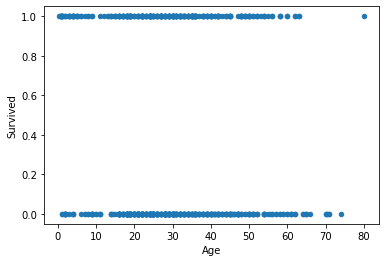

In [6]:
df.plot('Age','Survived',kind='scatter');

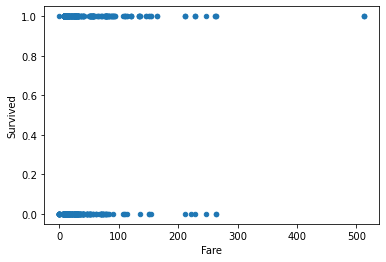

In [7]:
df.plot('Fare','Survived',kind='scatter');

### Q: What are the preprocessing steps I need to perform before I create the model?

- Fill/drop in missing/null values
- Feature Selection / Feature Engineering (interaction terms)
- Handling categorial variables
    - One Hot Encoding 
    - Label Encoding
- Handling Outliers (maybe apply today)
- Normalizing/Standardizing our data

- **Multicollinearity (does it still matter as much for Logistic?)**

- Train-test-split


### Preprocessing

In [8]:
## Null Values
df.isna().sum() / len(df)

Pclass      0.054994
Age         0.198653
SibSp       0.000000
Fare        0.000000
Sex         0.000000
Embarked    0.002245
Survived    0.000000
dtype: float64

In [9]:
target = 'Survived'
X = df.drop(columns=target)
y = df[target]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [10]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_test.shape

((668, 6), (223,))

In [11]:
cat_cols = X_train.select_dtypes('O').columns
cat_cols

Index(['Sex', 'Embarked'], dtype='object')

In [12]:
num_cols = X_train.select_dtypes('number').columns
num_cols

Index(['Pclass', 'Age', 'SibSp', 'Fare'], dtype='object')

In [13]:
X_train.isna().sum()

Pclass       36
Age         131
SibSp         0
Fare          0
Sex           0
Embarked      2
dtype: int64

```python
from sklearn.impute import SimpleImputer
imputer_num = SimpleImputer(strategy='median')

imputer_cat = SimpleImputer(strategy='most_frequent')#,fill_value='missing')

X_train[num_cols] = imputer_num.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer_num.transform(X_test[num_cols])

X_train[cat_cols] = imputer_cat.fit_transform(X_train[cat_cols])
X_test[cat_cols] = imputer_cat.transform(X_test[cat_cols])

# df['Age'] = imputer.fit_transform(df[['Age']])
```

In [14]:
X_train.isna().any(axis=1)

511     True
198     True
614    False
540    False
314    False
       ...  
98     False
209    False
783     True
880    False
300     True
Length: 668, dtype: bool

In [15]:
train_nulls = X_train.isna().any(axis=1)
test_nulls = X_test.isna().any(axis=1)
train_nulls

511     True
198     True
614    False
540    False
314    False
       ...  
98     False
209    False
783     True
880    False
300     True
Length: 668, dtype: bool

In [16]:
## Drop Nulls
X_train = X_train.loc[~train_nulls]
y_train = y_train.loc[~train_nulls]

X_test = X_test.loc[~test_nulls]
y_test = y_test.loc[~test_nulls]

In [17]:
display(X_train.isna().sum(), X_test.isna().sum())

Pclass      0
Age         0
SibSp       0
Fare        0
Sex         0
Embarked    0
dtype: int64

Pclass      0
Age         0
SibSp       0
Fare        0
Sex         0
Embarked    0
dtype: int64

In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False,drop='first')#,handle_unknown='ignore')
encoder

OneHotEncoder(drop='first', sparse=False)

In [19]:
X_train_ohe = X_train.drop(columns=cat_cols).copy()
X_test_ohe = X_test.drop(columns=cat_cols).copy()


encoder.fit(X_train[cat_cols])

X_train_ohe[encoder.get_feature_names(cat_cols)] = encoder.transform(X_train[cat_cols])
X_test_ohe[encoder.get_feature_names(cat_cols)] = encoder.transform(X_test[cat_cols])

In [20]:
X_train_ohe

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
614,3.0,35.0,0,8.050,1.0,0.0,1.0
540,1.0,36.0,0,71.000,0.0,0.0,1.0
314,2.0,43.0,1,26.250,1.0,0.0,1.0
162,3.0,26.0,0,7.775,1.0,0.0,1.0
743,3.0,24.0,1,16.100,1.0,0.0,1.0
...,...,...,...,...,...,...,...
450,2.0,36.0,1,27.750,1.0,0.0,1.0
715,3.0,19.0,0,7.650,1.0,0.0,1.0
98,2.0,34.0,0,23.000,0.0,0.0,1.0
209,1.0,40.0,0,31.000,1.0,0.0,0.0


In [21]:
## Scale data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler= StandardScaler()

X_train_sca = X_train_ohe.copy()
X_test_sca = X_test_ohe.copy()


X_train_sca[num_cols] = scaler.fit_transform(X_train_sca[num_cols])
X_test_sca[num_cols] = scaler.transform(X_test_sca[num_cols])

In [22]:
X_train_sca#.describe().round(2)

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
614,0.870531,0.378067,-0.546037,-0.491571,1.0,0.0,1.0
540,-1.539441,0.446403,-0.546037,0.697690,0.0,0.0,1.0
314,-0.334455,0.924756,0.492865,-0.147734,1.0,0.0,1.0
162,0.870531,-0.236958,-0.546037,-0.496766,1.0,0.0,1.0
743,0.870531,-0.373630,0.492865,-0.339489,1.0,0.0,1.0
...,...,...,...,...,...,...,...
450,-0.334455,0.446403,0.492865,-0.119396,1.0,0.0,1.0
715,0.870531,-0.715311,-0.546037,-0.499128,1.0,0.0,1.0
98,-0.334455,0.309731,-0.546037,-0.209133,0.0,0.0,1.0
209,-1.539441,0.719748,-0.546037,-0.057996,1.0,0.0,0.0


## Fitting a Logistic Regression with `statsmodels`

In [23]:
import statsmodels.api as sms

In [24]:
X_train_sca

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
614,0.870531,0.378067,-0.546037,-0.491571,1.0,0.0,1.0
540,-1.539441,0.446403,-0.546037,0.697690,0.0,0.0,1.0
314,-0.334455,0.924756,0.492865,-0.147734,1.0,0.0,1.0
162,0.870531,-0.236958,-0.546037,-0.496766,1.0,0.0,1.0
743,0.870531,-0.373630,0.492865,-0.339489,1.0,0.0,1.0
...,...,...,...,...,...,...,...
450,-0.334455,0.446403,0.492865,-0.119396,1.0,0.0,1.0
715,0.870531,-0.715311,-0.546037,-0.499128,1.0,0.0,1.0
98,-0.334455,0.309731,-0.546037,-0.209133,0.0,0.0,1.0
209,-1.539441,0.719748,-0.546037,-0.057996,1.0,0.0,0.0


In [25]:
y_train.value_counts()

0    309
1    199
Name: Survived, dtype: int64

In [26]:
X_train_sms = sm.add_constant(X_train_sca)
X_test_sms = sm.add_constant(X_test_sca)
X_train_sms

,const,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
614,1.0,0.870531,0.378067,-0.546037,-0.491571,1.0,0.0,1.0
540,1.0,-1.539441,0.446403,-0.546037,0.697690,0.0,0.0,1.0
314,1.0,-0.334455,0.924756,0.492865,-0.147734,1.0,0.0,1.0
162,1.0,0.870531,-0.236958,-0.546037,-0.496766,1.0,0.0,1.0
743,1.0,0.870531,-0.373630,0.492865,-0.339489,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
450,1.0,-0.334455,0.446403,0.492865,-0.119396,1.0,0.0,1.0
715,1.0,0.870531,-0.715311,-0.546037,-0.499128,1.0,0.0,1.0
98,1.0,-0.334455,0.309731,-0.546037,-0.209133,0.0,0.0,1.0
209,1.0,-1.539441,0.719748,-0.546037,-0.057996,1.0,0.0,0.0


In [27]:
logit = sm.Logit(y_train,X_train_sms).fit()
logit.summary()


Optimization terminated successfully.
         Current function value: 0.433646
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  508
Model:                          Logit   Df Residuals:                      500
Method:                           MLE   Df Model:                            7
Date:                Thu, 06 May 2021   Pseudo R-squ.:                  0.3523
Time:                        10:23:58   Log-Likelihood:                -220.29
converged:                       True   LL-Null:                       -340.11
Covariance Type:            nonrobust   LLR p-value:                 4.423e-48
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2424      0.332      3.741      0.000       0.591       1.893
Pclass        -0.9260      0.169     -5.464      0.000      -1.258      -0.594
Age           -0.6604      0.150     -4.407      0.000      -0.954      -0.367
SibSp         -0.4016      0.142     -2.825      0.005      -0.680      -0.123
Fare           0.1363      0.148      0.921      0.357      -0.154       0.426
Sex_male      -2.7553      0.257    -10.728      0.000      -3.259      -2.252
Embarked_Q    -0.3899      0.708     -0.551      0.582      -1.778       0.998
Embarked_S    -0.0701      0.335     -0.209      0.834      -0.728       0.587
==============================================================================
"""

> ### But how do we know how GOOD it is?

# Evaluating Classifications 

> [The 5 Classification Evaluation metrics every Data Scientist must know](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226)

## Evaluation Metrics

### Accuracy

$$ \large \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

> "Out of all the predictions our model made, what percentage were correct?"
- "Accuracy is the most common metric for classification. It provides a solid holistic view of the overall performance of our 
model."

#### When to use?
- **Accuracy** is good for non-technical audiences (but can be misleading with imbalanced classes)


In [28]:
from sklearn import metrics

In [29]:
y_hat_train = logit.predict(X_train_sms)
y_hat_test = logit.predict(X_test_sms)

In [32]:
y_hat_test,y_test

(758    0.080076
 169    0.114479
 207    0.121051
 170    0.203815
 418    0.243752
          ...   
 246    0.672475
 537    0.954763
 551    0.276207
 820    0.822893
 242    0.250955
 Length: 168, dtype: float64,
 758    0
 169    0
 207    1
 170    0
 418    0
       ..
 246    0
 537    1
 551    0
 820    1
 242    0
 Name: Survived, Length: 168, dtype: int64)

In [33]:
metrics.accuracy_score(y_test, y_hat_test)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [34]:
display(y_hat_test.head(),y_test.head())

758    0.080076
169    0.114479
207    0.121051
170    0.203815
418    0.243752
dtype: float64

758    0
169    0
207    1
170    0
418    0
Name: Survived, dtype: int64

> #### Huh?! ... Compare Predictions vs Original Data

In [35]:
y_hat_train  = y_hat_train.round()
y_hat_test  = y_hat_test.round()

In [36]:
metrics.accuracy_score(y_test, y_hat_test)

0.7857142857142857

In [37]:
y_test.value_counts(normalize=True)

0    0.595238
1    0.404762
Name: Survived, dtype: float64

In [38]:
metrics.accuracy_score(y_train, y_hat_train)

0.8031496062992126

### Precision

> "**_Precision_** measures what proportion of predicted Positives is truly Positive?


$$ \large \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$


#### When to use?
- **Use precision** when the cost of acting is high and acting on a positive is costly.
   - e.g. Allocating resources/interventions for prisoners who are at-risk for recidivism. 

In [ ]:
metrics.precision_score(y_test, y_hat_test)

### Recall

> **_Recall_** indicates what percentage of the classes we're interested in were actually captured by the model."
$$ \large \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$ 


#### When to use?
- **Use recall** when the number of true positives/opportunities is small and you don’t want to miss one.
    - e.g. cancer diagnosis. (telling someone they do not have cancer when they actually do is fatal)

In [ ]:
metrics.recall_score(y_test, y_hat_test)

<img src='https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/precisionrecall.png' width=10%>

### $F_1$ Score

F1 score represents the **_Harmonic Mean of Precision and Recall_**.  In short, this means that the F1 score cannot be high without both precision and recall also being high. When a model's F1 score is high, you know that your model is doing well all around. 

> Harmonic Mean: "the reciprocal of the arithmetic mean of the reciprocals of a given set of observatins." - *[Wikipedia](https://en.wikipedia.org/wiki/Harmonic_mean)*

#### Arithmetic Mean:

$$\large \bar{X} = \frac{a+b+c}{n} $$

#### Harmonic Mean:

$$ \large \bar{X} = \frac{n}{\frac{1}{a}+ \frac{1}{b}+ \frac{1}{c}}$$


**The formula for F1 score is:**

> $$ \text{F1 score} =  \frac{2}{\text{Precision}^{-1}\ x\ \text{Recall}^{-1}}= 2\ \frac{\text{Precision}\ x\ \text{Recall}}{\text{Precision} + \text{Recall}} $$

#### When to use?
- **F1 score** is really the most informative about overall model quality.
- BUT is the most difficult to express to a non-tech audience

## Which metric to use?

- **When in doubt, use them all!** 
 -`metrics.classification_report`
 

In [ ]:
print(metrics.classification_report(y_test,y_hat_test,target_names=['Died','Survived']))

In [ ]:
metrics.recall_score(y_test, y_hat_test).round(2)

- **But some good rules of thumb:**
    - **Accuracy** is good for non-technical audiences (but can be misleading with imbalanced classes)
    
    - **Use recall** when the number of true positives/opportunities is small and you don’t want to miss one.
        - e.g. cancer diagnosis. (telling someone they do not have cancer when they actually do is fatal)
    - **Use precision** when the cost of acting is high and acting on a positive is costly.
       - e.g. Allocating resources/interventions for prisoners who are at-risk for recidivism. 

- **F1 score** is really the most informative about overall model quality, but is the most difficult to express to a non-tech audience

## Confusion Matrices

- A **confusion matrix** separates our predictions into 4 types of outcomes (for a binary classification):
    - **_True Positives (TP)_**: The number of observations where the model predicted the person has the disease (1), and they actually do have the disease (1).

    - **_True Negatives (TN)_**: The number of observations where the model predicted the person is healthy (0), and they are actually healthy (0).

    - **_False Positives (FP)_**: The number of observations where the model predicted the person has the disease (1), but they are actually healthy (0). 

    - **_False Negatives (FN)_**: The number of observations where the model predicted the person is healthy (0), but they actually have the disease (1).

    <img src="https://raw.githubusercontent.com/learn-co-students/dsc-visualizing-confusion-matrices-lab-online-ds-ft-100719/master/images/new_confusion_matrix_2.png" width=50%>

In [ ]:
cm = metrics.confusion_matrix(y_test,y_hat_test)
cm

In [ ]:
cm = metrics.confusion_matrix(y_test,y_hat_test,normalize='true')
cm

In [ ]:
print(metrics.classification_report(y_test,y_hat_test,target_names=['Died','Survived']))

In [ ]:
classes = ['Died','Survived']

In [ ]:
ax = sns.heatmap(cm, annot=True, center =0 , 
                 xticklabels=classes,yticklabels=classes,cmap='Blues')
ax.set(ylabel='True Classses',xlabel='Predicted Classes', 
       title='Normalized Confusion Matrix')

In [ ]:
def plot_confusion_matrix(y_test,y_hat_test,normalize='true',
                         classes = ['Died','Survived']):
    
    cm = metrics.confusion_matrix(y_test,y_hat_test,normalize=normalize)
    ax = sns.heatmap(cm, annot=True, center =0 , 
                     
                 xticklabels=classes,yticklabels=classes,cmap='Blues')
    ax.set(ylabel='True Classses',xlabel='Predicted Classes', 
           title='Normalized Confusion Matrix')


In [ ]:
plot_confusion_matrix(y_test,y_hat_test)#,normalize=)

In [ ]:
def evaluate_model(y_test,y_hat_test,normalize='true',
                         classes = ['Died','Survived']):
    dashes='---'*20
    print(dashes)
    print("\tCLASSIFICATION REPORT")
    print(dashes)
    print(metrics.classification_report(y_test,
                                        y_hat_test,
                                        target_names=classes))
    print(dashes)
    plot_confusion_matrix(y_test,y_hat_test,normalize=normalize,
                         classes=classes)

In [ ]:
evaluate_model(y_test,y_hat_test)

# APPENDIX 

## IMPORTANT NOTE ABOUT PACKAGE VERSIONS

### scikit-learn & matplotlib

In [ ]:
#### scikit-learn version
## Run COnda List to Verify what versions are installed and how
# %conda list scikit-learn

- You will need sklearn to be version 0.23 + to have all of the tools covered in lessons.
    > Note: sklearn is listed as `scikit-learn`<br>to update: 
    `conda update scikit-learn`
 

In [ ]:
## If have less than 0.23, run this command
# %conda update scikit-learn

In [ ]:
#### matplotlib version
# %conda list matplotlib

- You will want to update matplotlib to fix errors with your confusion matrix plots
    > `pip install -U matplotlib`

In [ ]:
# !pip install -U matplotlib

In [ ]:
def remake_df(array,df):
    return pd.DataFrame(array, columns=df.columns, index=df.index)

def fit_evaluate_model(linreg,X_train_sca, X_test_sca, y_train, y_test):
    linreg.fit(X_train_sca, y_train)

    y_hat_train = linreg.predict(X_train_sca)
    y_hat_test = linreg.predict(X_test_sca)

    return linreg

def get_model_coeffs(X_df, sklearn_model=None, ols_model = None):
    
    coeffs_df = pd.DataFrame()
    
    if sklearn_model is not None:

        coeffs = dict(zip(X_df.columns,sklearn_model.coef_))
        coeffs['const'] = sklearn_model.intercept_

        coeffs_df = pd.DataFrame(coeffs,index=['sklearn']).T

    if ols_model is not None:
        coeffs_df = coeffs_df.join(ols_model.params.rename('statsmodels'))
        coeffs_df = coeffs_df.join(ols_model.pvalues.rename('p-values').round(4))
        
    return coeffs_df